In [32]:
!pip3 install pandas-gbq -U
!pip3 install pandas
!pip3 install pandasql
!pip3 install google-cloud-bigquery --upgrade

  Using cached https://files.pythonhosted.org/packages/70/78/cd5ce606a487cf62e82784237599b332dbdf23a41aa237578d906a49bee1/pandas_gbq-0.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/d7/3d031f57e4117a564979835bbf1233244eb31960a46f38a9ad0fe078363b/pydata_google_auth-0.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8b/01/13758ff9b970008ccf9e0dcc3b86d0e01937d7485b9a2c6142c9c2bdb4da/google_api_core-1.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/f2/3c225e7a69cb27d283b68bff867722bd066bc1858611180197f711815ea5/google_cloud_core-0.29.1-py2.py3-none-any.whl
google-cloud-monitoring 0.28.0 has requirement google-api-core<0.2.0dev,>=0.1.1, but you'll have google-api-core 1.7.0 which is incompatible.
google-cloud-monitoring 0.28.0 has requirement google-cloud-core<0.29dev,>=0.28.0, but you'll have google-cloud-core 0.29.1 which is incompatible.
  Found existing installation: pandas-gbq 0.3.0
  

  Found existing installation: google-cloud-bigquery 1.8.1
    Uninstalling google-cloud-bigquery-1.8.1:
      Successfully uninstalled google-cloud-bigquery-1.8.1


In [1]:
import pandas as pd

df_orig = pd.read_csv("./data/CleanedData.csv") 
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level
0,House,Mercier/Hochelaga-Maisonneuve,9 Rooms 2+1 Bedrooms 2+0 Bathrooms/Powder ro...,349000,45.601880,-73.533093,Bungalow Semi-detached,1953,2651.0,2,0,Basement 6 feet or +,0.5
1,Condo,Mercier/Hochelaga-Maisonneuve,8 Rooms 0+2 Bedrooms 1+1 Bathrooms/Powder ro...,420000,45.550884,-73.535767,Divided,1928,1237.0,0,0,Basement 6 feet or +,0.0
2,House,Ville-Marie,8 Rooms 3+0 Bedrooms 2+0 Bathrooms/Powder ro...,995000,45.497413,-73.552884,Two or more storey Attached,2003,NaN,0,1,NaN,0.0
3,Condo,Ville-Marie,6 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,649000,45.522374,-73.563403,Divided,1923,1660.0,1,0,NaN,1.0
4,Condo,Lachine,8 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,375000,45.436800,-73.706455,Divided,1999,1006.0,1,1,Located on a river,0.0


In [2]:
df_orig['htype'] = df_orig.Type.astype('category').cat.codes
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype
0,House,Mercier/Hochelaga-Maisonneuve,9 Rooms 2+1 Bedrooms 2+0 Bathrooms/Powder ro...,349000,45.601880,-73.533093,Bungalow Semi-detached,1953,2651.0,2,0,Basement 6 feet or +,0.5,4
1,Condo,Mercier/Hochelaga-Maisonneuve,8 Rooms 0+2 Bedrooms 1+1 Bathrooms/Powder ro...,420000,45.550884,-73.535767,Divided,1928,1237.0,0,0,Basement 6 feet or +,0.0,2
2,House,Ville-Marie,8 Rooms 3+0 Bedrooms 2+0 Bathrooms/Powder ro...,995000,45.497413,-73.552884,Two or more storey Attached,2003,NaN,0,1,NaN,0.0,4
3,Condo,Ville-Marie,6 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,649000,45.522374,-73.563403,Divided,1923,1660.0,1,0,NaN,1.0,2
4,Condo,Lachine,8 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,375000,45.436800,-73.706455,Divided,1999,1006.0,1,1,Located on a river,0.0,2


In [3]:
df_orig['cityIndex'] = df_orig.City.astype('category').cat.codes
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype,cityIndex
0,House,Mercier/Hochelaga-Maisonneuve,9 Rooms 2+1 Bedrooms 2+0 Bathrooms/Powder ro...,349000,45.601880,-73.533093,Bungalow Semi-detached,1953,2651.0,2,0,Basement 6 feet or +,0.5,4,14
1,Condo,Mercier/Hochelaga-Maisonneuve,8 Rooms 0+2 Bedrooms 1+1 Bathrooms/Powder ro...,420000,45.550884,-73.535767,Divided,1928,1237.0,0,0,Basement 6 feet or +,0.0,2,14
2,House,Ville-Marie,8 Rooms 3+0 Bedrooms 2+0 Bathrooms/Powder ro...,995000,45.497413,-73.552884,Two or more storey Attached,2003,NaN,0,1,NaN,0.0,4,27
3,Condo,Ville-Marie,6 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,649000,45.522374,-73.563403,Divided,1923,1660.0,1,0,NaN,1.0,2,27
4,Condo,Lachine,8 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,375000,45.436800,-73.706455,Divided,1999,1006.0,1,1,Located on a river,0.0,2,12


In [4]:
df_input = df_orig.drop(['Type', 'City', 'Rooms', 'lat', 'lng', 'Basement'], axis=1)
df_input.head(n=5)

,Price,type,year,lot size,Driveway,Garage,Risk Level,htype,cityIndex
0,349000,Bungalow Semi-detached,1953,2651.0,2,0,0.5,4,14
1,420000,Divided,1928,1237.0,0,0,0.0,2,14
2,995000,Two or more storey Attached,2003,NaN,0,1,0.0,4,27
3,649000,Divided,1923,1660.0,1,0,1.0,2,27
4,375000,Divided,1999,1006.0,1,1,0.0,2,12


In [5]:
df_input1 = df_input.dropna()
df_input1.head(n=5)

,Price,type,year,lot size,Driveway,Garage,Risk Level,htype,cityIndex
0,349000,Bungalow Semi-detached,1953,2651.0,2,0,0.50,4,14
1,420000,Divided,1928,1237.0,0,0,0.00,2,14
3,649000,Divided,1923,1660.0,1,0,1.00,2,27
4,375000,Divided,1999,1006.0,1,1,0.00,2,12
5,559900,Two or more storey Detached,1953,4275.0,1,1,0.75,4,24


In [24]:
X = df_input1.drop(['Risk Level', 'type', 'Driveway'], axis=1)
y = df_input1['Risk Level']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test.shape

(1737, 6)

In [26]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
y_pred = regressor.predict(X_test) 
resultDF=pd.DataFrame({'Actual Risk Level':y_test, 'Predicted Risk Level':y_pred})  
resultDF.head(10)
X_test.join(resultDF).head(20)

,Price,year,lot size,Garage,htype,cityIndex,Actual Risk Level,Predicted Risk Level
4381,339000,2003,1169.0,1,2,14,0.25,0.25
6269,170000,2014,802.0,0,2,22,0.00,0.00
5755,229900,2011,698.0,0,2,28,0.00,0.00
3959,1375000,1917,2250.0,1,4,5,1.75,1.75
1360,229000,2009,837.0,1,2,14,0.50,0.50
2799,510000,1921,2750.0,0,3,26,1.50,1.50
336,229000,2009,883.0,0,2,25,0.50,0.50
1726,219000,1999,739.0,0,2,11,0.50,0.50
4550,1150000,1920,2500.0,0,7,13,0.75,0.75
5406,605000,1971,2407.0,2,3,11,0.00,0.00


In [29]:
from sklearn import metrics 
import numpy as np
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2_score:  1.0


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


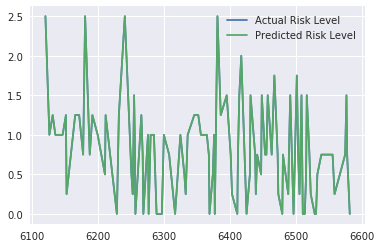

In [30]:
resultDF.sort_index()[-100:].plot()